## CCLE

## Description

This CCLE dataset is made by performing the usual bulk RNA-seq technique, then normalizing using RPKM (Reads Per Kilobase of transcript per Million) to reduce variance and make samples comparable.

The RPKM normalization solves two problems created during sequencing:

1. **Sequencing depth**, which happens when samples are sequenced to different depths. Some samples may have more or fewer total reads, but that difference does not reflect biology, so we correct for it.  
2. **Gene length**, because longer genes generate more reads just by being longer, and shorter genes fewer reads. Normalizing by gene length accounts for that.

The normalized (i, j) RPKM value, where (i) is a gene and (j) is a sample, is:

$$
\mathrm{RPKM}_{i,j}
=
\frac{x_{i,j}}{\,l_i \cdot \sum_k x_{k,j}\,}
\times 10^6
$$

<!-- blank line above is important -->
- **$x_{i,j}$** is the raw read count for gene \(i\) in sample \(j).  
- **$l_i$** is the length of gene \(i\) in kilobases (kb).  
- **$\sum_{k} x_{k,j}$** is the total number of reads in sample \(j\).  

In [72]:
import pandas as pd
import numpy as np

# mRna Seq
# Expression Data with gene as index and samples as columns
data_mrna_seq_rpkm = pd.read_csv('ccle_data/data_mrna_seq_rpkm.txt',
                    sep = '\t',
                    comment = '#')

data_mrna_seq_rpkm.set_index('Hugo_Symbol',inplace=True)

# Merge with mean duplicated rows
data_mrna_seq_rpkm = data_mrna_seq_rpkm.groupby(data_mrna_seq_rpkm.index).mean()

In [66]:
data_mrna_seq_rpkm.head()

,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
CRIPTOP1,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7SK,0.029785,0.03377,0.047608,0.02094,0.00430,0.017847,0.006893,0.00704,0.008042,0.148955,...,0.083175,0.02683,0.002032,0.024993,0.094365,0.393628,0.035012,0.002465,0.05875,0.067953
A1BG,0.362300,0.00608,0.115170,0.33737,3.06452,0.013390,2.180160,2.24186,0.095400,3.698050,...,0.012700,0.09324,0.011340,0.060090,0.026380,0.019230,0.505580,0.578600,0.71115,0.849120
A1BG-AS1,4.815880,0.18959,0.751510,1.32578,9.15532,0.064590,1.619220,4.48351,0.631410,6.483210,...,0.371360,0.52954,0.187460,0.121010,0.359240,0.809130,2.750650,2.918060,2.06849,2.596400
A1CF,5.654860,2.55482,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,4.12239,0.000000,0.000000,0.000000,0.000000,0.000000,0.011540,0.00589,0.000000


In [68]:
# Mutations matrix
# Data telling which sample has a mutation in TP53 and the actual mutation
mutations= pd.read_csv('ccle_data/mutations.txt',
                    sep = '\t',
                    comment = '#')
mutations.set_index('SAMPLE_ID',inplace=True)

mutations.head()

,STUDY_ID,TP53
SAMPLE_ID,,
SJRH30_SOFT_TISSUE,ccle_broad_2019,R280S R273C Y205C
FADU_UPPER_AERODIGESTIVE_TRACT,ccle_broad_2019,R248L X225_splice
HH_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ccle_broad_2019,X187_splice
SKNMC_BONE,ccle_broad_2019,WT
SNU182_LIVER,ccle_broad_2019,S215I


## Class balance check

We check how many samples are in each class before training, because if one class is much larger the model can become biased toward it. A balanced dataset helps the model learn to recognize both classes equally.

In [69]:
wt_count = 0
mut_count = 0

for mut_type in mutations['TP53']:
    if mut_type  == 'WT':
        wt_count += 1
    else:
        mut_count += 1

print(f"Number of WTs: {wt_count}")
print(f"Number of mutated: {mut_count}")

Number of WTs: 571
Number of mutated: 999


There are almost twice as many mutated samples as WT. This imbalance may cause the model to overpredict the mutated class. To address it, we can:

- Use class weights in the loss function  
- Oversample the WT class or undersample the mutated class  
- Use techniques like SMOTE to generate synthetic WT examples  


In [70]:
# Transpose the data matrix, necessary to build the classifier
data_t = data_mrna_seq_rpkm.T

data_t.head()

Hugo_Symbol,CRIPTOP1,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,...,snoZ13_snr52,snoZ178,snoZ185,snoZ247,snoZ40,snoZ5,snoZ6,snosnR60_Z15,snosnR66,yR211F11.2
22RV1_PROSTATE,0.0,0.029785,0.36230,4.81588,5.65486,1.98954,1.27348,0.01960,0.91070,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.341940,0.0,0.0,0.0755
2313287_STOMACH,0.0,0.033770,0.00608,0.18959,2.55482,0.00782,0.22274,0.01738,0.32801,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.239685,0.0,0.0,0.0000
253JBV_URINARY_TRACT,0.0,0.047608,0.11517,0.75151,0.00000,0.05044,0.00000,0.00544,0.60473,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000
253J_URINARY_TRACT,0.0,0.020940,0.33737,1.32578,0.00000,0.02878,0.00000,0.00547,0.46686,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.0,0.004300,3.06452,9.15532,0.00000,0.02477,0.00000,0.00000,0.09900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000913,0.0,0.0,0.0000


In [73]:
# Target vector
y = []

# Data matrix
X_rows = []
sample_names = []

c = 0
# Iterate over each mutation record to build the data matrix
for sample_id, mut_type in mutations['TP53'].items():
    if sample_id in data_t.index:
        # grab the full row from data_t and store it
        X_rows.append(data_t.loc[sample_id].values)
        y.append(0 if mut_type == 'WT' else 1)
        sample_names.append(sample_id)
    else:
        c += 1

X = pd.DataFrame(
    X_rows,
    index=sample_names,
    columns=data_t.columns
)
y = np.array(y)

print(f"Number of samples discarded: {c}")
print(f"Final number of samples available: {X.shape[0]}")

Number of samples discarded: 444
Final number of samples available: 1126


In [53]:
# Make sure X and y shape match
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1126, 54353)
y shape: (1126,)


## Train - Test split (90% - 10%)
Because of data scarcity, we decided to reduce the test size to 10%

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

print(f"Train shape:\n\tX_train: {X_train_np.shape}\n\ty_train: {y_train_np.shape}")
print(f"Test shape:\n\tX_test: {X_test_np.shape}\n\ty_test: {y_test_np.shape}")

Train shape:
	X_train: (1013, 54353)
	y_train: (1013,)
Test shape:
	X_test: (113, 54353)
	y_test: (113,)


## Model selection and Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,        # full depth
    random_state=42,
    n_jobs=-1              # use all cores
)

In [76]:
# Train
rf.fit(X_train_np, y_train_np)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [77]:
# Predict
y_pred = rf.predict(X_test_np)

## Evaluation metrics

**Accuracy**: the fraction of total samples correctly predicted (both WT and mutated). Good for a quick overview.  

In [60]:
from sklearn.metrics import accuracy_score

# y_test_np are your true labels 
# y_pred your predictions
acc = accuracy_score(y_test_np, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 84.51%


**Precision**: positive predictive value.  
$$
    \text{Precision} = \tfrac{\text{TP}}{\text{TP} + \text{FP}}
$$
**TP**: True Positive  
**FP**: False Positive 

In [61]:
from sklearn.metrics import precision_score

# y_test_np is your true labels array
# y_pred is your predicted labels
prec = precision_score(y_test_np, y_pred)
print(f'Precision: {prec*100:.2f}%')

Precision: 84.43%


**Recall**: the fraction of actual mutated samples the model correctly identified, good for understanding how many real mutations you catch.  
$$
  \text{Recall} = \tfrac{\text{TP}}{\text{TP} + \text{FN}}
$$
**TP**: True Positive  
**FP**: False Negative 

In [62]:
from sklearn.metrics import recall_score

# y_test_np is your true labels array
# y_pred is your predicted labels
rec = recall_score(y_test_np, y_pred)
print(f'Recall: {rec*100:.2f}%')

Recall: 94.00%


**F1 score**: the harmonic mean of precision and recall, good for balancing false positives and false negatives.

In [78]:
from sklearn.metrics import f1_score

# y_test_np is your true labels array, y_pred your predicted labels
f1 = f1_score(y_test_np, y_pred)
print(f'F1 score: {f1*100:.2f}%')

F1 score: 90.20%


**Confusion matrix**: a table of
* **True Positives** (TP): mutated correctly called mutated
* **True Negatives** (TN): WT correctly called WT
* **False Positives** (FP): WT called mutated
* **False Negatives** (FN): mutated called WT

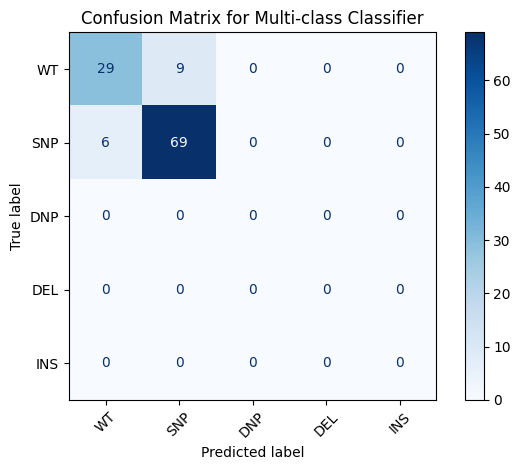

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix for all five classes
cm = confusion_matrix(y_test_np, y_pred, labels=[0,1,2,3,4])

# Define the class names in the same order as their codes
class_names = ['WT', 'SNP', 'DNP', 'DEL', 'INS']

# Create and plot the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=45)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multi-class Classifier')
plt.tight_layout()
plt.show()
